In [1]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm as tqdm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sys
from gensim.models import Word2Vec

In [2]:
os.getcwd()

'C:\\Users\\raghvendra.pal\\Downloads\\git\\stg.poc.2020.surveillance.ml-basics.786014\\02-classification'

In [3]:
PATH = '../BBCSports/bbcsport-fulltext-asis/bbcsport/'
classes = os.listdir(PATH)
classes.remove('README.TXT')

In [4]:
print(classes)

['athletics', 'cricket', 'football', 'rugby', 'tennis']


In [5]:
print("There are {} classes present for the BBC sports dataset".format(len(classes)))

There are 5 classes present for the BBC sports dataset


In [6]:
classes

['athletics', 'cricket', 'football', 'rugby', 'tennis']

In [7]:
PATH+classes[0]

'../BBCSports/bbcsport-fulltext-asis/bbcsport/athletics'

In [8]:
class_data = os.listdir(PATH+classes[0])

In [9]:
class_data[2]

'003.txt'

In [10]:
len(class_data)

101

In [11]:
PATH+classes[0]+"/"+class_data[0]

'../BBCSports/bbcsport-fulltext-asis/bbcsport/athletics/001.txt'

In [12]:
file1 = open(PATH+classes[0]+"/"+class_data[0],"r")

In [13]:
file1.read()

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [14]:
text_list = []
class_list = []
class_num = []
for SPORT in tqdm(classes):
    for FILE_NAME in os.listdir(PATH+SPORT):
        file1 = open(PATH+SPORT+"/"+FILE_NAME,"r")
        text_list.append(file1.read())
        class_list.append(SPORT)
        class_num.append(classes.index(SPORT))

In [15]:
print("Length of Text Data : ", len(text_list))
print("Length of Class Data : ", len(class_list))
print("Length of Number Class Data : ", len(class_num))

Length of Text Data :  737
Length of Class Data :  737
Length of Number Class Data :  737


In [16]:
data_dict = {'Text':text_list,'Category':class_list, 'Class': class_num}
data  = pd.DataFrame(data_dict)

In [17]:
data.head()

,Text,Category,Class
0,Claxton hunting first major medal\n\nBritish h...,athletics,0
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,0
2,Greene sets sights on world title\n\nMaurice G...,athletics,0
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,0
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,0


In [18]:
data.iloc[101:110]

,Text,Category,Class
101,Hayden sets up Australia win\n\nSecond one-day...,cricket,1
102,Pietersen gives England a chance\n\nLunch: Eng...,cricket,1
103,South Africa far too strong again\n\nSecond on...,cricket,1
104,Pakistan on revenge mission\n\nPakistan's cric...,cricket,1
105,Russell to instruct keeper Jones\n\nFormer Eng...,cricket,1
106,England A roll to second victory\n\nOne-day to...,cricket,1
107,Kaif absence wrong - Azharuddin\n\nIndia were ...,cricket,1
108,Bracewell worried by Lee\n\nNew Zealand coach ...,cricket,1
109,Pakistan accept venues compromise\n\nThe doubt...,cricket,1


In [19]:
data.iloc[225:235]

,Text,Category,Class
225,Man Utd stroll to Cup win\n\nWayne Rooney made...,football,2
226,Van Nistelrooy set to return\n\nManchester Uni...,football,2
227,Moyes U-turn on Beattie dismissal\n\nEverton m...,football,2
228,Ronaldo considering new contract\n\nManchester...,football,2
229,Smith keen on Home series return\n\nScotland m...,football,2
230,Mido makes third apology\n\nAhmed 'Mido' Hossa...,football,2
231,Man City 0-2 Man Utd\n\nManchester United redu...,football,2
232,Gerrard plays down European hopes\n\nSteven Ge...,football,2
233,Duff ruled out of Barcelona clash\n\nChelsea's...,football,2
234,Chelsea clinch cup in extra-time\n\n(after ext...,football,2


In [20]:
data.iloc[490:500]

,Text,Category,Class
490,Hodgson shoulders England blame\n\nFly-half Ch...,rugby,3
491,Vickery out of Six Nations\n\nEngland tight-he...,rugby,3
492,Yachvili savours France comeback\n\nFrance scr...,rugby,3
493,Laporte tinkers with team\n\nFrance coach Bern...,rugby,3
494,Lewsey puzzle over disallowed try\n\nEngland's...,rugby,3
495,Fuming Robinson blasts officials\n\nEngland co...,rugby,3
496,O'Gara revels in Ireland victory\n\nIreland fl...,rugby,3
497,Thomas out of Six Nations\n\nWales captain Gar...,rugby,3
498,Wales coach elated with win\n\nMike Ruddock pa...,rugby,3
499,Newcastle 27-27 Gloucester\n\nNewcastle centre...,rugby,3


In [21]:
data.iloc[637:647]

,Text,Category,Class
637,Henman overcomes rival Rusedski\n\nTim Henman ...,tennis,4
638,Safin slumps to shock Dubai loss\n\nMarat Safi...,tennis,4
639,Ferrero eyes return to top form\n\nFormer worl...,tennis,4
640,Roddick into San Jose final\n\nAndy Roddick wi...,tennis,4
641,Federer claims Dubai crown\n\nWorld number one...,tennis,4
642,Young debut cut short by Ginepri\n\nFifteen-ye...,tennis,4
643,Melzer shocks Agassi\n\nSecond seed Andre Agas...,tennis,4
644,Federer forced to dig deep\n\nTop seed Roger F...,tennis,4
645,Nadal marches on in Mexico\n\nRafael Nadal con...,tennis,4
646,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis,4


In [22]:
data['Category'].value_counts()

football     265
rugby        147
cricket      124
athletics    101
tennis       100
Name: Category, dtype: int64

In [23]:
data['Class'].value_counts()

2    265
3    147
1    124
0    101
4    100
Name: Class, dtype: int64

In [24]:
data.iloc[0,0]

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [25]:
print(data.iloc[0,0])
print(100*'=')
print(data.iloc[100,0])
print(100*'=')
print(data.iloc[200,0])
print(100*'=')
print(data.iloc[300,0])
print(100*'=')

Claxton hunting first major medal

British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.

The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week's Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.

For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous seasons,

# Remove Duplicates

In [26]:
data_unique = data.groupby(data.columns.tolist()).Class.agg('count').to_frame('Count').reset_index()

In [27]:
print("Number of duplicate rows in Data are : ",len(data)-len(data_unique))

Number of duplicate rows in Data are :  10


In [28]:
data_unique[data_unique.Count>1]

,Text,Category,Class,Count
76,Bortolami predicts dour contest\n\nItaly skipp...,rugby,3,2
174,Edwards tips Idowu for Euro gold\n\nWorld outd...,athletics,0,2
223,Ferguson rues failure to cut gap\n\nBoss Sir A...,football,2,2
262,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis,4,2
263,Harbhajan action given all-clear\n\nIndian spi...,cricket,1,2
302,Holmes starts 2005 with GB events\n\nKelly Hol...,athletics,0,2
317,India's top six secure - Ganguly\n\nCaptain So...,cricket,1,2
340,Jayasuriya set to join Somerset\n\nSomerset ar...,cricket,1,2
446,Moyes U-turn on Beattie dismissal\n\nEverton m...,football,2,2
606,Spain coach faces racism inquiry\n\nSpain's Fo...,football,2,2


In [29]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"shan't", "shall not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase


In [30]:
stopWords = set(stopwords.words('english'))

In [31]:
print(stopWords)

{'am', 'she', 'as', "couldn't", 'from', 'down', 'him', 'his', 'that', 'so', 'theirs', 'by', 're', 'any', 'both', 'only', "aren't", "you'll", 'hadn', 'shan', 'wasn', "wasn't", 'm', "shan't", 'at', 'now', 'hers', 'in', 'ours', 'just', 'doing', 'me', 'ain', 'above', 'below', 'which', 'during', 'doesn', 'been', 'most', 'y', 'himself', 'then', 'these', 'why', 'other', 'off', 'further', 'having', 'had', "mustn't", 'ourselves', "she's", "haven't", 'our', 'ma', 'haven', 'yours', 'don', 'her', 'but', 'or', 'some', 'my', 'we', 'than', 'wouldn', "doesn't", 'when', 'will', 'should', "won't", 'such', "should've", 'about', 'll', 'same', 'weren', 'do', 'shouldn', 'if', 'over', "isn't", "weren't", 'between', 'isn', 'with', 'their', 'before', 'herself', 'up', 'yourselves', 'its', 'too', 'mightn', 'myself', 'aren', 'are', 'was', 'how', 'of', 'on', 'did', 'not', 'i', 's', 've', 'won', 'have', 'through', 'under', 'them', 'more', 'all', 'couldn', 'has', 'there', "you've", 'where', 'is', 'whom', "didn't", '

In [32]:
# stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
# "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
# 'himself', \
# 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
# 'their',\
# 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
# 'these', 'those', \
# 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
# 'do', 'does', \
# 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
# 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
# 'before', 'after',\
# 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under'
# , 'again', 'further',\
# 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
# 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
# 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll'
# , 'm', 'o', 're', \
# 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
# "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
# "mightn't", 'mustn',\
# "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
# "wasn't", 'weren', "weren't", \
# 'won', "won't", 'wouldn', "wouldn't"])


In [33]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

porter = PorterStemmer()
preprocessed_data = []
# tqdm is for printing the status bar
for sentance in tqdm(data_unique['Text'].values):

#     sentance = decontracted(sentance)
    #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(porter.stem(e.lower()) for e in sentance.split() if e.lower() not in stopWords)
    preprocessed_data.append(sentance.strip())


### Before Stemming

In [34]:
list(data_unique.loc[:9, 'Text'])

["2004 - A year to remember\n\nClub football in South America continues to suffer from the continent's economic crisis.\n\nThe best players are lured across the Atlantic - 900 players left Brazil alone in 2004. And crowds are low, with money tight and the fear of violence proving a powerful incentive to stay at home. The average attendance in this year's Brazilian Championship was a record low of 8,139. Furthermore, in 2004 no new talent exploded on the continent with quite the same force as Diego, Robinho and Carlos Tevez in the two previous years. There is no doubt that the highlight of South America's footballing year has to come from the international game. There were some dramatic tournaments in 2004. The Copa America, held in Peru last July, could hardly have come to a more exciting conclusion. With the last kick of the final Brazil scored one of the most decisive equalising goals in the history of football.\n\nArgentina thought they had the game won and were in no state to take 

### After Stemming 

In [35]:
preprocessed_data[:10]

['year rememb club footbal south america continu suffer contin econom crisi best player lure across atlant player left brazil alon crowd low money tight fear violenc prove power incent stay home averag attend year brazilian championship record low furthermor new talent explod contin quit forc diego robinho carlo tevez two previou year doubt highlight south america footbal year come intern game dramat tournament copa america held peru last juli could hardli come excit conclus last kick final brazil score one decis equalis goal histori footbal argentina thought game state take penalti adriano blast forc shoot earlier year intens disappoint brazil amazingli fail qualifi olymp footbal tournament gold medal titl lack wait four year miss two qualif slot grab south america championship held chile januari argentina paraguay made went secur gold silver athen tournament terrif real highlight year south american footbal could come world cup qualif campaign reason time great player come back home 

In [36]:
data_unique['preprocessed_data'] = preprocessed_data

In [37]:
data_unique.head()

,Text,Category,Class,Count,preprocessed_data
0,2004 - A year to remember\n\nClub football in ...,football,2,1,year rememb club footbal south america continu...
1,2004: An Irish Athletics Year\n\n2004 won't be...,athletics,0,1,irish athlet year rememb one irish athlet grea...
2,"A November to remember\n\nLast Saturday, one n...",rugby,3,1,novemb rememb last saturday one newspap procla...
3,A need to limit foreign numbers\n\nWith all th...,football,2,1,need limit foreign number top club vy titl cha...
4,A year to remember for Irish\n\nThere used to ...,rugby,3,1,year rememb irish use one sublimin moment year...


In [38]:
data_unique.iloc[101:110]

,Text,Category,Class,Count,preprocessed_data
101,Castaignede fires Laporte warning\n\nFormer Fr...,rugby,3,1,castaigned fire laport warn former franc fli h...
102,Cech sets clean-sheet benchmark\n\nChelsea's P...,football,2,1,cech set clean sheet benchmark chelsea petr ce...
103,Celtic make late bid for Bellamy\n\nNewcastle ...,football,2,1,celtic make late bid bellami newcastl striker ...
104,Celtic unhappy over Bulgaria date\n\nMartin O'...,football,2,1,celtic unhappi bulgaria date martin neill hope...
105,Celts savour Grand Slam prospect\n\nThe Six Na...,rugby,3,1,celt savour grand slam prospect six nation her...
106,Charlton 1-2 Liverpool\n\nFernando Morientes g...,football,2,1,charlton liverpool fernando morient grab first...
107,Charvis set to lose fitness bid\n\nFlanker Col...,rugby,3,1,charvi set lose fit bid flanker colin charvi u...
108,Chelsea 3-0 Portsmouth\n\nDidier Drogba scored...,football,2,1,chelsea portsmouth didier drogba score twice l...
109,Chelsea clinch cup in extra-time\n\n(after ext...,football,2,1,chelsea clinch cup extra time extra time score...


In [39]:
data_unique.iloc[225:235]

,Text,Category,Class,Count,preprocessed_data
225,Ferrero eyes return to top form\n\nFormer worl...,tennis,4,1,ferrero eye return top form former world numbe...
226,Fifa agrees goal-line technology\n\nFifa is ex...,football,2,1,fifa agre goal line technolog fifa expect use ...
227,Finnan says Irish can win group\n\nSteve Finna...,football,2,1,finnan say irish win group steve finnan believ...
228,Fit-again Betsen in France squad\n\nFrance hav...,rugby,3,1,fit betsen franc squad franc brought flanker s...
229,Flintoff fit to bowl at Wanderers\n\nFourth Te...,cricket,1,1,flintoff fit bowl wander fourth test wander so...
230,Flintoff fit to bowl at Wanderers\n\nFourth Te...,cricket,1,1,flintoff fit bowl wander fourth test wander so...
231,"France v Wales (Sat)\n\nStade de France, Paris...",rugby,3,1,franc v wale sat stade de franc pari saturday ...
232,Freeman considers return to track\n\nFormer Ol...,athletics,0,1,freeman consid return track former olymp champ...
233,Fuming Robinson blasts officials\n\nEngland co...,rugby,3,1,fume robinson blast offici england coach andi ...
234,Fuming Robinson blasts officials\n\nEngland co...,rugby,3,1,fume robinson blast offici england coach andi ...


In [40]:
data_unique['Category'].value_counts()

football     262
rugby        146
cricket      121
athletics     99
tennis        99
Name: Category, dtype: int64

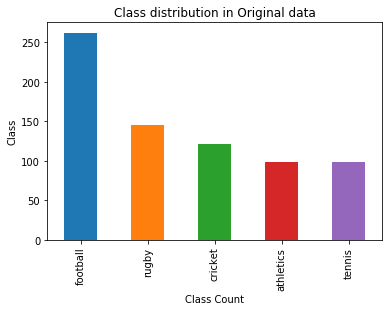

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
data_unique['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Original data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
X, X_test = train_test_split(data_unique, test_size=0.05, random_state=42)
X_train, X_val = train_test_split(X, test_size=0.05, random_state=42)

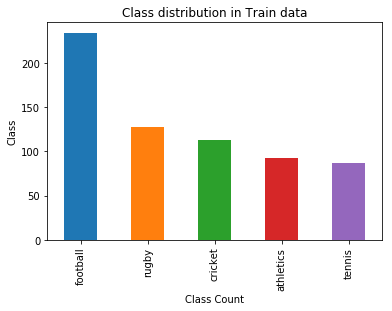

In [68]:
X_train['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Train data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

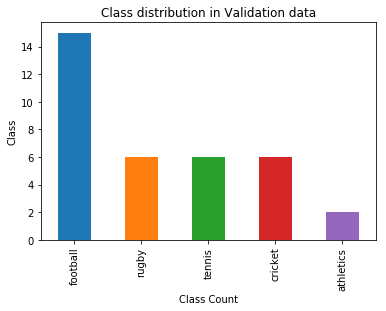

In [69]:
X_val['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Validation data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

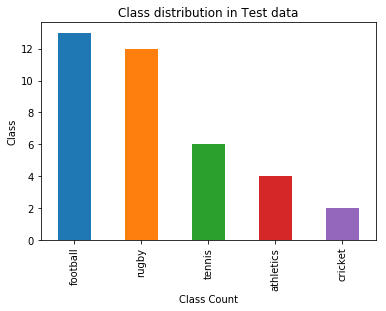

In [70]:
X_test['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Test data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

In [71]:
print("Shape of Train Data      : ",X_train.shape)
print("Shape of Validation Data : ",X_val.shape)
print("Shape of Test Data       : ",X_test.shape)

Shape of Train Data      :  (655, 5)
Shape of Validation Data :  (35, 5)
Shape of Test Data       :  (37, 5)


In [72]:
#BoW
count_vect = CountVectorizer(max_df = 70, min_df = 10, max_features = 3000) #in scikit-learn
count_vect.fit(X_train['preprocessed_data'])
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
final_counts = count_vect.transform(X_train['preprocessed_data'])
final_cv = count_vect.transform(X_val['preprocessed_data'])
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])


some feature names  ['aaa', 'ab', 'abdul', 'abil', 'abl', 'absenc', 'absolut', 'ac', 'accept', 'accid']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (655, 1469)
the number of unique words  1469


In [73]:
# print(count_vect.get_feature_names())
[(key, value) for key, value in sorted(count_vect.vocabulary_.items(), key=lambda x:x[1], reverse = True)][-10:]
# print(final_counts.toarray())

[('accid', 9),
 ('accept', 8),
 ('ac', 7),
 ('absolut', 6),
 ('absenc', 5),
 ('abl', 4),
 ('abil', 3),
 ('abdul', 2),
 ('ab', 1),
 ('aaa', 0)]

### TF-IDF

In [74]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),max_df = 70, min_df = 10, max_features = 3000)
tf_idf_vect.fit(X_train['preprocessed_data'])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf_train = tf_idf_vect.transform(X_train['preprocessed_data'])
final_tf_idf_cv = tf_idf_vect.transform(X_val['preprocessed_data'])
print("the type of count vectorizer ",type(final_tf_idf_train))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_train.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf_train.get_shape()[1])

some sample features(unique words in the corpus) ['aaa', 'ab', 'ab de', 'abdul', 'abdul razzaq', 'abil', 'abl', 'absenc', 'absolut', 'ac']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (655, 1864)
the number of unique words including both unigrams and bigrams  1864


# Applying Model

### Linear SVM Bayes :

In [75]:
# taking the value of C (hyperparameter) from the range of 0.0001 to 100
n=np.arange(-4,3)
print(n)
r=pow(float(10),n)
print(r)

[-4 -3 -2 -1  0  1  2]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [87]:
C_list = []
i = 0.0001
for count in range(500):
    C_list.append(i)
    i = round(i+0.01,4)
    

In [88]:
print(C_list)

[0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701, 0.0801, 0.0901, 0.1001, 0.1101, 0.1201, 0.1301, 0.1401, 0.1501, 0.1601, 0.1701, 0.1801, 0.1901, 0.2001, 0.2101, 0.2201, 0.2301, 0.2401, 0.2501, 0.2601, 0.2701, 0.2801, 0.2901, 0.3001, 0.3101, 0.3201, 0.3301, 0.3401, 0.3501, 0.3601, 0.3701, 0.3801, 0.3901, 0.4001, 0.4101, 0.4201, 0.4301, 0.4401, 0.4501, 0.4601, 0.4701, 0.4801, 0.4901, 0.5001, 0.5101, 0.5201, 0.5301, 0.5401, 0.5501, 0.5601, 0.5701, 0.5801, 0.5901, 0.6001, 0.6101, 0.6201, 0.6301, 0.6401, 0.6501, 0.6601, 0.6701, 0.6801, 0.6901, 0.7001, 0.7101, 0.7201, 0.7301, 0.7401, 0.7501, 0.7601, 0.7701, 0.7801, 0.7901, 0.8001, 0.8101, 0.8201, 0.8301, 0.8401, 0.8501, 0.8601, 0.8701, 0.8801, 0.8901, 0.9001, 0.9101, 0.9201, 0.9301, 0.9401, 0.9501, 0.9601, 0.9701, 0.9801, 0.9901, 1.0001, 1.0101, 1.0201, 1.0301, 1.0401, 1.0501, 1.0601, 1.0701, 1.0801, 1.0901, 1.1001, 1.1101, 1.1201, 1.1301, 1.1401, 1.1501, 1.1601, 1.1701, 1.1801, 1.1901, 1.2001, 1.2101, 1.2201, 1.2301, 1.2401,

# Training on different algorithms

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [90]:
def learning_hyperparameter_on_different_algo(train_data, cv_data, kernel, degree = 3):
    train_accuracy = {}
    val_accuracy = {}
    train_loss ={}
    val_loss = {}
    for C in C_list:
        if kernel == 'poly':
            model = SVC(C=C, kernel = kernel, degree = degree)
        else: 
            model = SVC(C=C, kernel = kernel) 
        model.fit(train_data, X_train['Class'].values)
        predicted_classes = model.predict(train_data)
        predicted_val_classes = model.predict(cv_data)
        accuracy_train = accuracy_score(X_train['Class'].values.flatten(),predicted_classes)
        accuracy_cv = accuracy_score(X_val['Class'].values.flatten(),predicted_val_classes)
        train_accuracy[C] = accuracy_train
        val_accuracy[C] = accuracy_cv
        train_loss[C] = 1 - accuracy_train
        val_loss[C] = 1 - accuracy_cv
    if kernel == 'poly':
        kernel = kernel+"-"+str(degree)
    return train_accuracy, val_accuracy, train_loss, val_loss, kernel

In [91]:
def adding_datatoDataframe(train_result):
    train_accuracy_dataframe[train_result[4]] = train_result[0].values()
    val_accuracy_dataframe[train_result[4]] = train_result[1].values()
    train_loss_dataframe[train_result[4]] = train_result[2].values()
    val_loss_dataframe[train_result[4]] = train_result[3].values()

In [92]:
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
# train_accuracy = val_accuracy = train_loss = val_loss = []
train_accuracy_dataframe = pd.DataFrame(index = C_list)
val_accuracy_dataframe = pd.DataFrame(index = C_list)
train_loss_dataframe = pd.DataFrame(index = C_list)
val_loss_dataframe = pd.DataFrame(index = C_list)
for index,kernel in tqdm(enumerate(kernel_list)):
    if kernel == 'poly':
        for degree in range(1,6):
            train_result = learning_hyperparameter_on_different_algo(final_counts, final_cv, kernel,degree)
            adding_datatoDataframe(train_result)
    else:
        train_result = learning_hyperparameter_on_different_algo(final_counts, final_cv, kernel)
        adding_datatoDataframe(train_result)

In [93]:
train_accuracy_dataframe

,linear,poly-1,poly-2,poly-3,poly-4,poly-5,rbf,sigmoid
0.0001,0.358779,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0101,0.989313,0.357252,0.357252,0.357252,0.358779,0.358779,0.357252,0.357252
0.0201,0.996947,0.357252,0.357252,0.358779,0.358779,0.358779,0.357252,0.357252
0.0301,1.000000,0.357252,0.357252,0.358779,0.358779,0.358779,0.357252,0.357252
0.0401,1.000000,0.357252,0.357252,0.358779,0.358779,0.358779,0.357252,0.357252
0.0501,1.000000,0.357252,0.358779,0.358779,0.358779,0.358779,0.357252,0.357252
0.0601,1.000000,0.357252,0.358779,0.358779,0.358779,0.358779,0.357252,0.357252
0.0701,1.000000,0.357252,0.358779,0.358779,0.358779,0.358779,0.357252,0.357252
0.0801,1.000000,0.357252,0.358779,0.358779,0.358779,0.358779,0.357252,0.357252
0.0901,1.000000,0.357252,0.358779,0.358779,0.358779,0.358779,0.357252,0.357252


In [94]:
val_accuracy_dataframe.head()

,linear,poly-1,poly-2,poly-3,poly-4,poly-5,rbf,sigmoid
0.0001,0.457143,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
0.0101,0.885714,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
0.0201,0.942857,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
0.0301,0.942857,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
0.0401,0.942857,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571


In [95]:
# val_accuracy_dataframe = val_accuracy_dataframe.cumsum()
def plot_graph(Dataframe, title, y_label):
    plt.figure(figsize=(20,20))
    Dataframe.plot()
    plt.title(title)
    plt.xlabel('C Value')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

<Figure size 1440x1440 with 0 Axes>

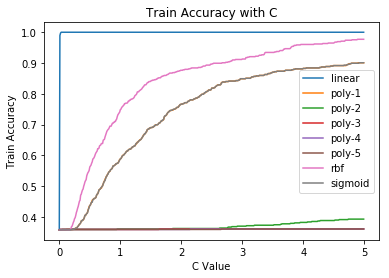

In [96]:
plot_graph(train_accuracy_dataframe, "Train Accuracy with C", "Train Accuracy")

<Figure size 1440x1440 with 0 Axes>

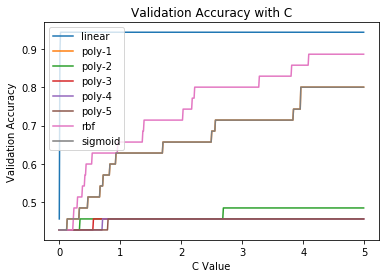

In [97]:
plot_graph(val_accuracy_dataframe, "Validation Accuracy with C", "Validation Accuracy")

# Train on Unigram Data

In [98]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [99]:
def learning_best_hyperparameter(train_data, cv_data, loss):
    train_accuracy = {}
    val_accuracy = {}
    train_loss ={}
    val_loss = {}
    for C in C_list:
        model = SGDClassifier(alpha=C, penalty = "l2", loss = loss)
        model.fit(train_data, X_train['Class'].values)
        predicted_classes = model.predict(train_data)
        predicted_val_classes = model.predict(cv_data)
        accuracy_train = accuracy_score(X_train['Class'].values.flatten(),predicted_classes)
        accuracy_cv = accuracy_score(X_val['Class'].values.flatten(),predicted_val_classes)
        train_accuracy[C] = accuracy_train
        val_accuracy[C] = accuracy_cv
        train_loss[C] = 1 - accuracy_train
        val_loss[C] = 1 - accuracy_cv
    return train_accuracy, val_accuracy, train_loss, val_loss

In [100]:
loss_list = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
# train_accuracy = val_accuracy = train_loss = val_loss = []
train_accuracy_dataframe = pd.DataFrame(index = C_list, columns = loss_list)
val_accuracy_dataframe = pd.DataFrame(index = C_list, columns = loss_list)
train_loss_dataframe = pd.DataFrame(index = C_list, columns = loss_list)
val_loss_dataframe = pd.DataFrame(index = C_list, columns = loss_list)
for index,loss_name in tqdm(enumerate(loss_list)):
    train_result = learning_best_hyperparameter(final_counts, final_cv, loss_name)
    train_accuracy_dataframe[loss_name] = train_result[0].values()
    val_accuracy_dataframe[loss_name] = train_result[1].values()
    train_loss_dataframe[loss_name] = train_result[2].values()
    val_loss_dataframe[loss_name] = train_result[3].values()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [101]:
train_accuracy_dataframe

,hinge,log,modified_huber,squared_hinge,perceptron
0.0001,1.000000,1.000000,1.000000,1.000000,1.000000
0.0101,1.000000,1.000000,1.000000,1.000000,1.000000
0.0201,1.000000,1.000000,1.000000,1.000000,1.000000
0.0301,1.000000,1.000000,1.000000,1.000000,1.000000
0.0401,1.000000,1.000000,1.000000,1.000000,1.000000
0.0501,1.000000,0.998473,1.000000,1.000000,1.000000
0.0601,1.000000,0.998473,1.000000,0.992366,1.000000
0.0701,1.000000,0.996947,1.000000,0.990840,1.000000
0.0801,1.000000,0.996947,1.000000,0.992366,1.000000
0.0901,0.998473,0.995420,1.000000,0.984733,1.000000


In [102]:
val_accuracy_dataframe

,hinge,log,modified_huber,squared_hinge,perceptron
0.0001,0.942857,0.914286,0.914286,0.885714,0.885714
0.0101,0.942857,0.914286,0.942857,0.857143,0.914286
0.0201,0.942857,0.942857,0.914286,0.914286,0.885714
0.0301,0.942857,0.942857,0.914286,0.914286,0.914286
0.0401,0.942857,0.942857,0.914286,0.885714,0.971429
0.0501,0.942857,0.942857,0.914286,0.885714,0.942857
0.0601,0.942857,0.942857,0.942857,0.914286,0.914286
0.0701,0.942857,0.942857,0.942857,0.885714,0.885714
0.0801,0.942857,0.914286,0.942857,0.942857,0.971429
0.0901,0.942857,0.914286,0.942857,0.885714,0.885714


In [103]:
# val_accuracy_dataframe = val_accuracy_dataframe.cumsum()
def plot_graph(Dataframe, title, y_label):
    plt.figure(figsize=(20,20))
    Dataframe.plot()
    plt.title(title)
    plt.xlabel('C Value')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

<Figure size 1440x1440 with 0 Axes>

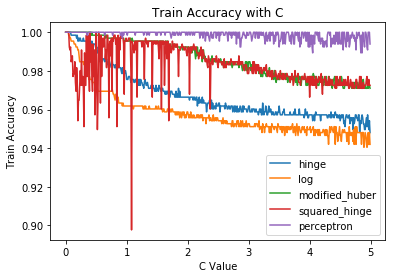

In [104]:
plot_graph(train_accuracy_dataframe, "Train Accuracy with C", "Train Accuracy")

<Figure size 1440x1440 with 0 Axes>

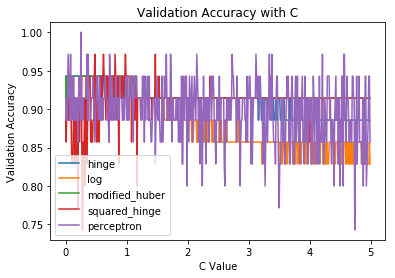

In [105]:
plot_graph(val_accuracy_dataframe, "Validation Accuracy with C", "Validation Accuracy")

# Train on hinge loss

In [106]:
train_result = learning_best_hyperparameter(final_counts, final_cv, 'hinge')  

### Accuracy Graph 

In [107]:
def plot_accuracy_without_label():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].plot(list(train_result[0].keys()),list(train_result[0].values()),label="Train Accuracy")
#     for xy in zip(train_accuracy.keys(), np.round(list(train_accuracy.values()),2)):
#         axes[0].annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
        
    axes[1].plot(list(train_result[1].keys()),list(train_result[1].values()),label="CV Accuracy")

#     for xy in zip(val_accuracy.keys(), np.round(list(val_accuracy.values()),2)):
#         axes[1].annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.xlabel('C Value')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()

In [108]:
def plot_accuracy():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].plot(list(train_result[0].keys()),list(train_result[0].values()),label="Train Accuracy")
    for xy in zip(train_result[0].keys(), np.round(list(train_result[0].values()),2)):
        axes[0].annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
        
    axes[1].plot(list(train_result[1].keys()),list(train_result[1].values()),label="CV Accuracy")

    for xy in zip(train_result[1].keys(), np.round(list(train_result[1].values()),2)):
        axes[1].annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.xlabel('C Value')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()

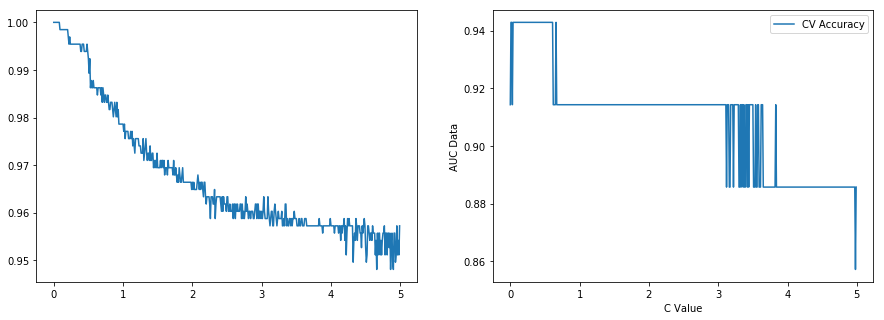

In [109]:
plot_accuracy_without_label()

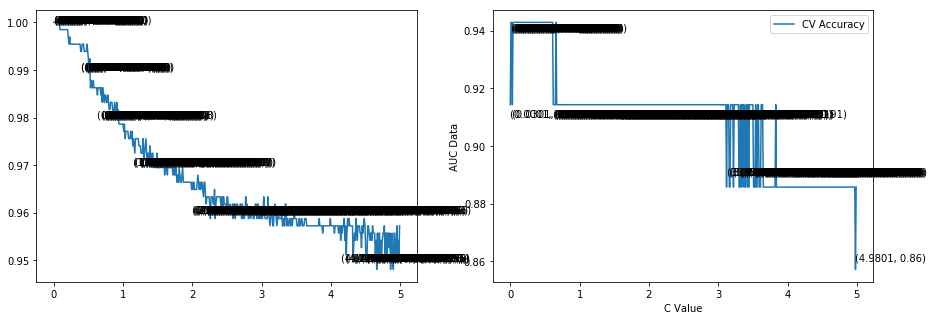

In [110]:
plot_accuracy()

### Loss Graph

In [111]:
def plot_loss_without_label():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].plot(list(train_result[2].keys()),list(train_result[2].values()),label="Train Accuracy")
#     for xy in zip(train_loss.keys(), np.round(list(train_loss.values()),2)):
#         axes[0].annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    axes[1].plot(list(train_result[3].keys()),list(train_result[3].values()),label="CV Accuracy")
#     for xy in zip(val_loss.keys(), np.round(list(val_loss.values()),2)):
#         axes[1].annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.xlabel('C Value')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()

In [112]:
def plot_loss():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].plot(list(train_result[2].keys()),list(train_result[2].values()),label="Train Accuracy")
    for xy in zip(train_result[2].keys(), np.round(list(train_result[2].values()),2)):
        axes[0].annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    axes[1].plot(list(train_result[3].keys()),list(train_result[3].values()),label="CV Accuracy")
    for xy in zip(train_result[3].keys(), np.round(list(train_result[3].values()),2)):
        axes[1].annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.xlabel('C Value')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()

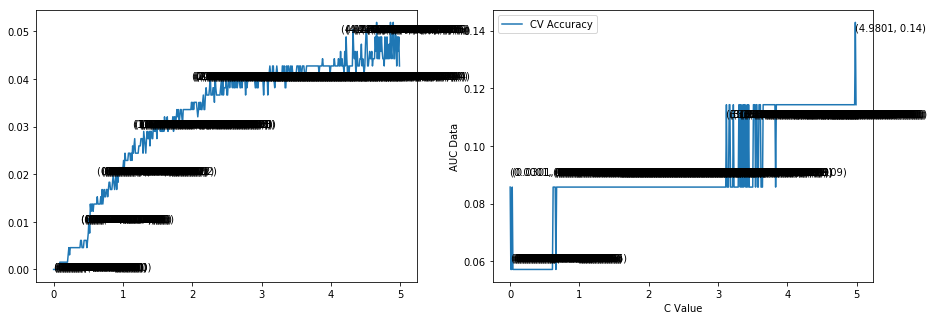

In [113]:
plot_loss()

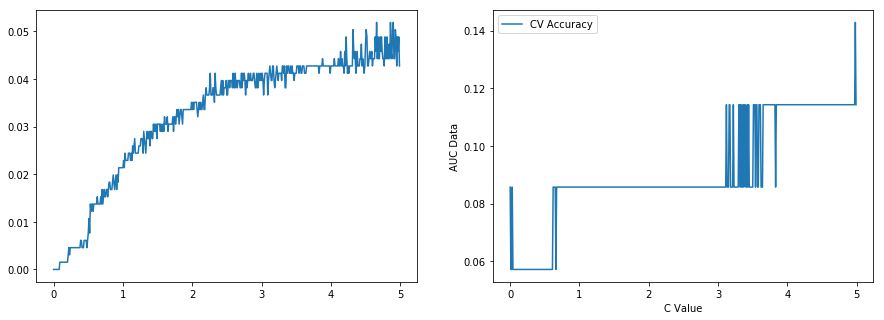

In [114]:
plot_loss_without_label()

# Getting Hyperparameter from which we are getting good Accuracy on Train and Test Data without overfitting

### Predicting on Test Data

In [116]:
def training_best_model(alpha, vectorizer, train, loss):
    model = SGDClassifier(alpha=alpha, penalty = "l2", loss = loss)
    model.fit(train, X_train['Class'].values)
    predicted_train_classes = model.predict(train)
    predicted_test_classes = model.predict(vectorizer.transform(X_test['preprocessed_data']))
    predicted_category = [classes[index] for index in predicted_test_classes]
    accuracy_train = accuracy_score(X_train['Class'].values.flatten(),predicted_train_classes)
    accuracy = accuracy_score(X_test['Class'].values.flatten(),predicted_test_classes)
    return model, predicted_test_classes, predicted_category, accuracy, accuracy_train

In [117]:
model_bow, predicted_test_classes, predicted_category, accuracy, accuracy_train = training_best_model(0.0001, count_vect, final_counts, "hinge")

In [118]:
print("Getting {} % Accuracy on train Data".format(round(accuracy_train*100,2)) )
print("Getting {} % Accuracy on test Data".format(round(accuracy*100,2)) )

Getting 100.0 % Accuracy on train Data
Getting 94.59 % Accuracy on test Data


In [119]:
# This function will give top 10 positive class feature which has hightest probability from BOW data with l1 regularizer
def most_informative_feature_for_class(vectorizer, classifier, class_label, start_index, end_index):
    classlabel = classes.index(class_label)
    print("Class Name : ",class_label)
    print("Class Index : ",classlabel)
#     labelid = list(classifier.classes_).index(classlabel)
#     print(labelid)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[classlabel], vectorizer.get_feature_names()), reverse=True)[start_index:end_index]
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df
#     for coe, name in topn:
#         print(abs(coe), name)

# This function will give top 10 positive class feature which has hightest probability from BOW data with l1 regularizer
def most_negative_feature_for_class(vectorizer, classifier, class_label, start_index, end_index):
    classlabel = classes.index(class_label)
    print("Class Name : ",class_label)
    print("Class Index : ",classlabel)
#     labelid = list(classifier.classes_).index(classlabel)
#     print(labelid)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[classlabel], vectorizer.get_feature_names()))[start_index:end_index]
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df
#     for coe, name in topn:
#         print(abs(coe), name)

In [120]:
classes

['athletics', 'cricket', 'football', 'rugby', 'tennis']

Most Important Feature for class : 
Class Name :  athletics
Class Index :  0


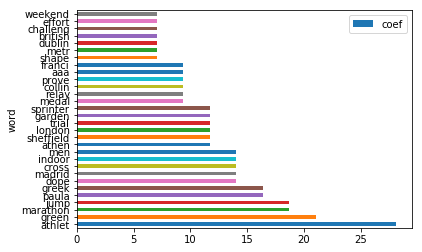

In [121]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(count_vect,model_bow,'athletics',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Negative Feature for class : 
Class Name :  athletics
Class Index :  0


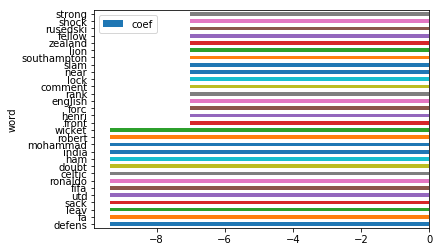

In [122]:
print("Most Negative Feature for class : ")
df = most_negative_feature_for_class(count_vect,model_bow,'athletics',30,60)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  cricket
Class Index :  1


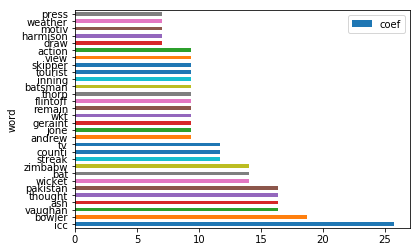

In [123]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(count_vect,model_bow,'cricket',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Negative Feature for class : 
Class Name :  cricket
Class Index :  1


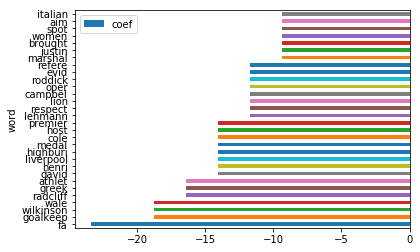

In [124]:
print("Most Negative Feature for class : ")
df = most_negative_feature_for_class(count_vect,model_bow,'cricket',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  football
Class Index :  2


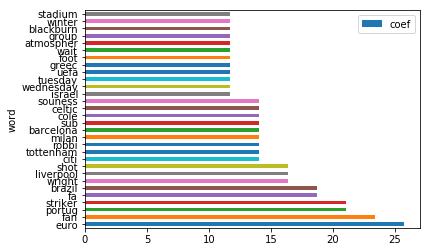

In [125]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(count_vect,model_bow,'football',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Negative Feature for class : 
Class Name :  football
Class Index :  2


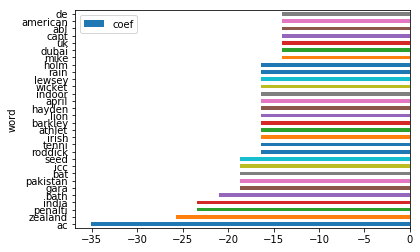

In [126]:
print("Most Negative Feature for class : ")
df = most_negative_feature_for_class(count_vect,model_bow,'football',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  rugby
Class Index :  3


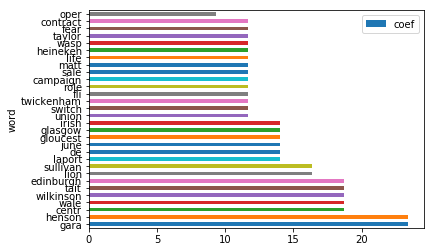

In [127]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(count_vect,model_bow,'rugby',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Negative Feature for class : 
Class Name :  rugby
Class Index :  3


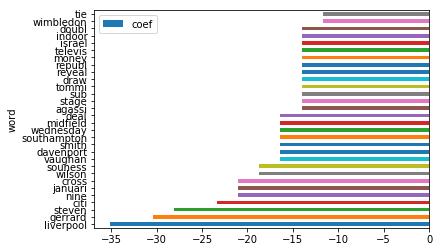

In [128]:
print("Most Negative Feature for class : ")
df = most_negative_feature_for_class(count_vect,model_bow,'rugby',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  tennis
Class Index :  4


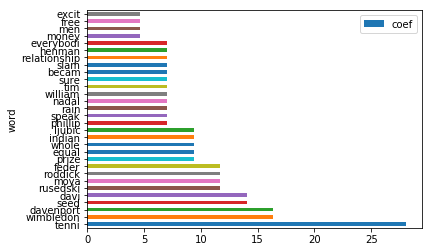

In [129]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(count_vect,model_bow,'tennis',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Negative Feature for class : 
Class Name :  tennis
Class Index :  4


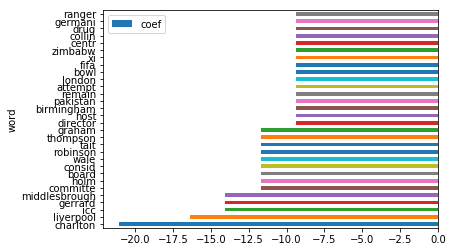

In [130]:
print("Most Negative Feature for class : ")
df = most_negative_feature_for_class(count_vect,model_bow,'tennis',0,30)
ax = df.plot.barh(x='word', y='coef')

### Confusion Matrix

In [131]:
print(classification_report(X_test['Class'].values.flatten(),predicted_test_classes))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89         4
          1       1.00      1.00      1.00         2
          2       0.93      1.00      0.96        13
          3       1.00      0.83      0.91        12
          4       1.00      1.00      1.00         6

avg / total       0.95      0.95      0.95        37



In [132]:
import itertools
# Plotting Confusion matrix to know How much data is correctly and incorrectly predicted by our model.

def plot_confusion_matrix(cm, classes=['athletics', 'cricket', 'football', 'rugby', 'tennis'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [133]:
X_test['Category'].value_counts()

football     13
rugby        12
tennis        6
athletics     4
cricket       2
Name: Category, dtype: int64

Confusion matrix, without normalization
Normalized confusion matrix


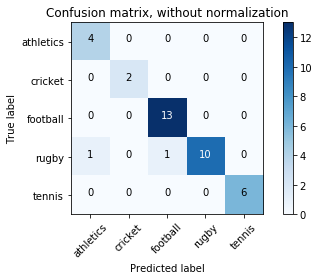

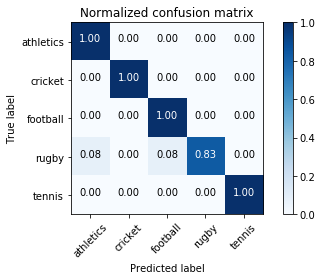

In [134]:
cnf_matrix  = confusion_matrix(X_test['Class'].values.flatten(),predicted_test_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [135]:
X_test.head()

,Text,Category,Class,Count,preprocessed_data
513,Poll explains free-kick decision\n\nReferee Gr...,football,2,1,poll explain free kick decis refere graham pol...
693,Wenger steps up row\n\nArsene Wenger has stepp...,football,2,1,wenger step row arsen wenger step feud sir ale...
377,Kuznetsova 'failed a drugs test'\n\nUS Open ch...,tennis,4,1,kuznetsova fail drug test us open champion sve...
33,Australia unchanged for Pakistan\n\nAustralia ...,cricket,1,1,australia unchang pakistan australia name unch...
63,Benitez delight after crucial win\n\nLiverpool...,football,2,1,benitez delight crucial win liverpool manag ra...


In [136]:
X_test['Unigram_Predicted_Test'] = predicted_test_classes
X_test['Unigram_Predicted_Test_Category'] = predicted_category

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [137]:
len(predicted_test_classes), len(X_test)

(37, 37)

In [138]:
X_test.head()

,Text,Category,Class,Count,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category
513,Poll explains free-kick decision\n\nReferee Gr...,football,2,1,poll explain free kick decis refere graham pol...,2,football
693,Wenger steps up row\n\nArsene Wenger has stepp...,football,2,1,wenger step row arsen wenger step feud sir ale...,2,football
377,Kuznetsova 'failed a drugs test'\n\nUS Open ch...,tennis,4,1,kuznetsova fail drug test us open champion sve...,4,tennis
33,Australia unchanged for Pakistan\n\nAustralia ...,cricket,1,1,australia unchang pakistan australia name unch...,1,cricket
63,Benitez delight after crucial win\n\nLiverpool...,football,2,1,benitez delight crucial win liverpool manag ra...,2,football


In [139]:
X_test_not_equal = X_test[X_test['Class'] != X_test['Unigram_Predicted_Test']]

In [140]:
X_test_not_equal.head()

,Text,Category,Class,Count,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category
210,Farrell saga to drag on - Lindsay\n\nWigan cha...,rugby,3,1,farrel saga drag lindsay wigan chairman mauric...,0,athletics
514,Pountney handed ban and fine\n\nNorthampton co...,rugby,3,1,pountney hand ban fine northampton coach budg ...,2,football


Most Important Feature for class : 
Class Name :  athletics
Class Index :  0


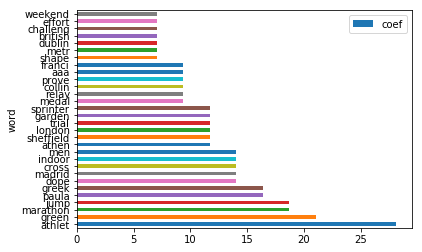

In [141]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(count_vect,model_bow,'athletics',0,30)
ax = df.plot.barh(x='word', y='coef')

In [142]:
X_test_not_equal.loc[210,"Text"]

'Farrell saga to drag on - Lindsay\n\nWigan chairman Maurice Lindsay says he does not expect a quick solution to the on-going saga of captain Andy Farrell\'s possible switch to rugby union.\n\nLeicester and Saracens are leading the chase for the player, but Lindsay told the BBC it was not yet a done deal. "As well as the Rugby Football Union, the league, the individual club and the England coaching team have a say, so it\'s not a quick decision," he said. "He\'s given us 12 years service so if he wants to go, we\'d support him." The prospect of Farrell switching codes has been the main talking point of the Super League season so far. "It came as a bolt out of the blue to us," admitted Lindsay. "But he\'s a very loyal friend to the club, so there\'s no question that he\'s deserting us. He just fancies a challenge."\n\nAlthough the move would be a lucrative one for both Farrell and Wigan, Lindsay said money was not a motivating factor for the club. "The money side of things hasn\'t been 

Most Important Feature for class : 
Class Name :  athletics
Class Index :  0


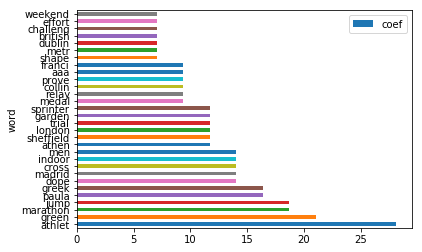

In [143]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(count_vect,model_bow,'athletics',0,30)
ax = df.plot.barh(x='word', y='coef')

In [144]:
X_test_not_equal.loc[210,"preprocessed_data"]

'farrel saga drag lindsay wigan chairman mauric lindsay say expect quick solut go saga captain andi farrel possibl switch rugbi union leicest saracen lead chase player lindsay told bbc yet done deal well rugbi footbal union leagu individu club england coach team say quick decis said given us year servic want go support prospect farrel switch code main talk point super leagu season far came bolt blue us admit lindsay loyal friend club question desert us fanci challeng although move would lucr one farrel wigan lindsay said money motiv factor club money side thing conclud point wigan told radio five live shortag money never problem us even salari cap spend penni anyway rather player lindsay also said understood rugbi union interest sign farrel great loss us great boost said warrior chief guy absolut sport icon top long demonstr mani attribut need make tough contact sport athlet like elleri hanley martin johnson come along often lucki whilst got'

In [145]:
X_test_not_equal.loc[210,["Category","Unigram_Predicted_Test_Category"]]

Category                               rugby
Unigram_Predicted_Test_Category    athletics
Name: 210, dtype: object

In [146]:
X_test_not_equal.loc[514,"Text"]

'Pountney handed ban and fine\n\nNorthampton coach Budge Pountney has been fined Â£2,000 and banned from match-day coaching for six weeks for calling a referee "a disgrace".\n\nPountney was found guilty of bringing the game into disrepute at a Rugby Football Union disciplinary hearing in London on Thursday night. Pountney criticised referee Steve Lander\'s performance in Northampton\'s defeat by Saracens on 5 February. The last two weeks of the six-week ban are suspended. Pountney pleaded guilty to the offence before a panel consisting of chairman Robert Horner, Nigel Gillingham and Jeff Probyn. The ban means former Scotland international Pountney cannot enter the playing enclosure, technical areas or go near the touchline, tunnel or players and officials\' areas on the day of a game.\n'

Most Important Feature for class : 
Class Name :  rugby
Class Index :  3


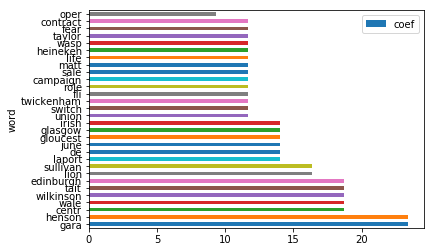

In [147]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(count_vect,model_bow,'rugby',0,30)
ax = df.plot.barh(x='word', y='coef')

In [148]:
X_test_not_equal.loc[514,"preprocessed_data"]

'pountney hand ban fine northampton coach budg pountney fine ban match day coach six week call refere disgrac pountney found guilti bring game disreput rugbi footbal union disciplinari hear london thursday night pountney criticis refere steve lander perform northampton defeat saracen februari last two week six week ban suspend pountney plead guilti offenc panel consist chairman robert horner nigel gillingham jeff probyn ban mean former scotland intern pountney cannot enter play enclosur technic area go near touchlin tunnel player offici area day game'

In [149]:
X_test_not_equal.loc[514,["Category","Unigram_Predicted_Test_Category"]]

Category                              rugby
Unigram_Predicted_Test_Category    football
Name: 514, dtype: object

In [150]:
test_data_result = pd.DataFrame({'Text':X_test['Text'], 'Pre-Processed Text':X_test['preprocessed_data'], 'Actual Category':X_test['Category'], 'Predicted Category':X_test['Unigram_Predicted_Test_Category']})

In [151]:
test_data_result.head()

,Text,Pre-Processed Text,Actual Category,Predicted Category
513,Poll explains free-kick decision\n\nReferee Gr...,poll explain free kick decis refere graham pol...,football,football
693,Wenger steps up row\n\nArsene Wenger has stepp...,wenger step row arsen wenger step feud sir ale...,football,football
377,Kuznetsova 'failed a drugs test'\n\nUS Open ch...,kuznetsova fail drug test us open champion sve...,tennis,tennis
33,Australia unchanged for Pakistan\n\nAustralia ...,australia unchang pakistan australia name unch...,cricket,cricket
63,Benitez delight after crucial win\n\nLiverpool...,benitez delight crucial win liverpool manag ra...,football,football


In [152]:
test_data_result.to_csv('test_result_bow_unigram_svm.csv',index=False)

### Predicting on Future Unseen Text Data

In [153]:
PATH = '../BBCSports/bbcsport-fulltext-single/data/'

In [154]:
def testing_data(path, model, vectorizer):
    test_files = os.listdir(path)
    test_files.remove('.ipynb_checkpoints')
    test_data = []
    for FILE_NAME in test_files:
        file1 = open(path+FILE_NAME,"r")
        test_data.append(file1.read())
    preprocessed_data_test = []
    # tqdm is for printing the status bar
    for sentance in tqdm(test_data):

    #     sentance = decontracted(sentance)
        #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(porter.stem(e.lower()) for e in sentance.split() if e.lower() not in stopWords)
        preprocessed_data_test.append(sentance.strip())
    predicted_on_unseen_classes = model.predict(vectorizer.transform(preprocessed_data_test))
    predicted_category = [classes[index] for index in predicted_on_unseen_classes]
    data_dict_test = {'Text':test_data,'Category':predicted_category}
    data_test  = pd.DataFrame(data_dict_test)
    return data_test

In [155]:
result_unseen_data_test = testing_data(PATH, model_bow, count_vect)

In [156]:
result_unseen_data_test.head()

,Text,Category
0,Henman overcomes rival Rusedski\n\nTim Henman ...,tennis
1,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis
2,Sharapova overcomes tough Molik\n\nWimbledon c...,tennis
3,Hayden sets up Australia win\n\nSecond one-day...,cricket
4,Pietersen gives England a chance\n\nLunch: Eng...,cricket


In [157]:
result_unseen_data_test.to_csv('result_bow_unigram_lsvm.csv')

# TFIDF 

# Training on different algorithms

In [158]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [159]:
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
# train_accuracy = val_accuracy = train_loss = val_loss = []
train_accuracy_dataframe = pd.DataFrame(index = C_list)
val_accuracy_dataframe = pd.DataFrame(index = C_list)
train_loss_dataframe = pd.DataFrame(index = C_list)
val_loss_dataframe = pd.DataFrame(index = C_list)
for index,kernel in tqdm(enumerate(kernel_list)):
    if kernel == 'poly':
        for degree in range(1,6):
            train_result = learning_hyperparameter_on_different_algo(final_tf_idf_train, final_tf_idf_cv, kernel,degree)
            adding_datatoDataframe(train_result)
    else:
        train_result = learning_hyperparameter_on_different_algo(final_tf_idf_train, final_tf_idf_cv, kernel)
        adding_datatoDataframe(train_result)

In [160]:
train_accuracy_dataframe

,linear,poly-1,poly-2,poly-3,poly-4,poly-5,rbf,sigmoid
0.0001,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0101,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0201,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0301,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0401,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0501,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0601,0.372519,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0701,0.441221,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0801,0.529771,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252
0.0901,0.639695,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252,0.357252


In [161]:
val_accuracy_dataframe.head()

,linear,poly-1,poly-2,poly-3,poly-4,poly-5,rbf,sigmoid
0.0001,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
0.0101,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
0.0201,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
0.0301,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
0.0401,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571


In [162]:
# val_accuracy_dataframe = val_accuracy_dataframe.cumsum()
def plot_graph(Dataframe, title, y_label):
    plt.figure(figsize=(20,20))
    Dataframe.plot()
    plt.title(title)
    plt.xlabel('C Value')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

<Figure size 1440x1440 with 0 Axes>

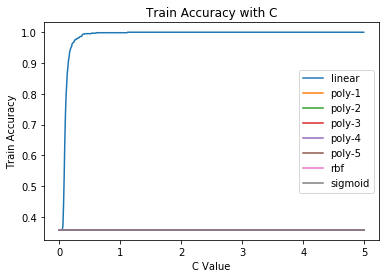

In [163]:
plot_graph(train_accuracy_dataframe, "Train Accuracy with C", "Train Accuracy")

<Figure size 1440x1440 with 0 Axes>

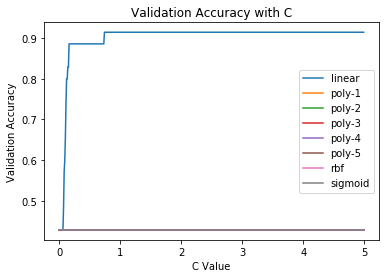

In [164]:
plot_graph(val_accuracy_dataframe, "Validation Accuracy with C", "Validation Accuracy")

## Train on TF-IDF data

In [165]:
loss_list = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
# train_accuracy = val_accuracy = train_loss = val_loss = []
tf_train_accuracy_dataframe = pd.DataFrame(index = C_list, columns = loss_list)
tf_val_accuracy_dataframe = pd.DataFrame(index = C_list, columns = loss_list)
tf_train_loss_dataframe = pd.DataFrame(index = C_list, columns = loss_list)
tf_val_loss_dataframe = pd.DataFrame(index = C_list, columns = loss_list)
for index,loss_name in tqdm(enumerate(loss_list)):
    train_result = learning_best_hyperparameter(final_tf_idf_train, final_tf_idf_cv, loss_name)
    tf_train_accuracy_dataframe[loss_name] = train_result[0].values()
    tf_val_accuracy_dataframe[loss_name] = train_result[1].values()
    tf_train_loss_dataframe[loss_name] = train_result[2].values()
    tf_val_loss_dataframe[loss_name] = train_result[3].values()

# train_accuracy, val_accuracy, train_loss, val_loss = learning_best_hyperparameter(final_tf_idf_train, final_tf_idf_cv)

<Figure size 1440x1440 with 0 Axes>

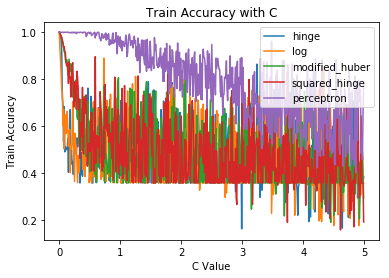

In [166]:
plot_graph(tf_train_accuracy_dataframe, "Train Accuracy with C", "Train Accuracy")

<Figure size 1440x1440 with 0 Axes>

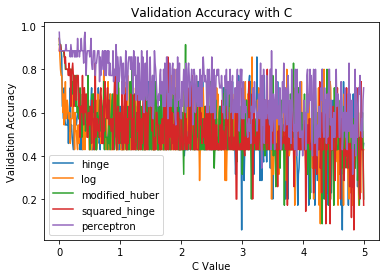

In [167]:
plot_graph(tf_val_accuracy_dataframe, "Validation Accuracy with C", "Validation Accuracy")

In [168]:
tf_train_accuracy_dataframe

,hinge,log,modified_huber,squared_hinge,perceptron
0.0001,1.000000,1.000000,1.000000,1.000000,1.000000
0.0101,0.986260,0.931298,0.998473,0.998473,1.000000
0.0201,0.983206,0.882443,0.989313,0.987786,1.000000
0.0301,0.967939,0.815267,0.984733,0.984733,1.000000
0.0401,0.914504,0.760305,0.977099,0.977099,1.000000
0.0501,0.723664,0.738931,0.967939,0.964885,1.000000
0.0601,0.688550,0.600000,0.955725,0.951145,1.000000
0.0701,0.532824,0.671756,0.935878,0.937405,0.998473
0.0801,0.682443,0.502290,0.916031,0.938931,1.000000
0.0901,0.490076,0.601527,0.916031,0.917557,1.000000


In [169]:
tf_val_accuracy_dataframe

,hinge,log,modified_huber,squared_hinge,perceptron
0.0001,0.942857,0.942857,0.914286,0.885714,0.971429
0.0101,0.914286,0.857143,0.914286,0.914286,0.885714
0.0201,0.914286,0.800000,0.914286,0.914286,0.885714
0.0301,0.885714,0.771429,0.885714,0.885714,0.885714
0.0401,0.857143,0.771429,0.885714,0.885714,0.885714
0.0501,0.628571,0.685714,0.885714,0.885714,0.885714
0.0601,0.628571,0.600000,0.885714,0.885714,0.885714
0.0701,0.571429,0.685714,0.885714,0.885714,0.885714
0.0801,0.714286,0.542857,0.857143,0.885714,0.885714
0.0901,0.571429,0.600000,0.857143,0.828571,0.885714


### Accuracy Graph

In [170]:
train_result = learning_best_hyperparameter(final_tf_idf_train, final_tf_idf_cv, 'hinge')

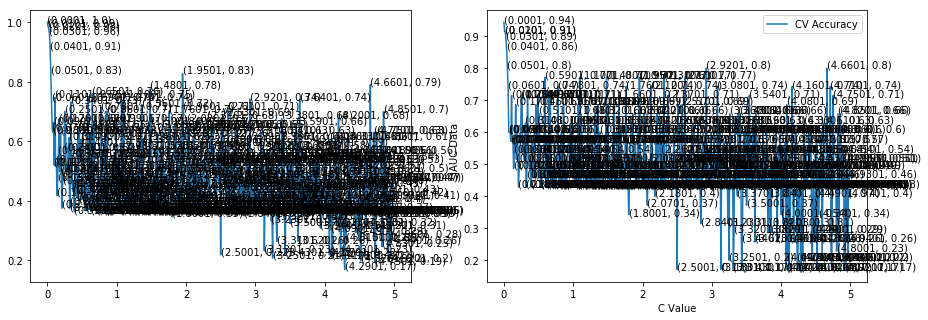

In [171]:
plot_accuracy()

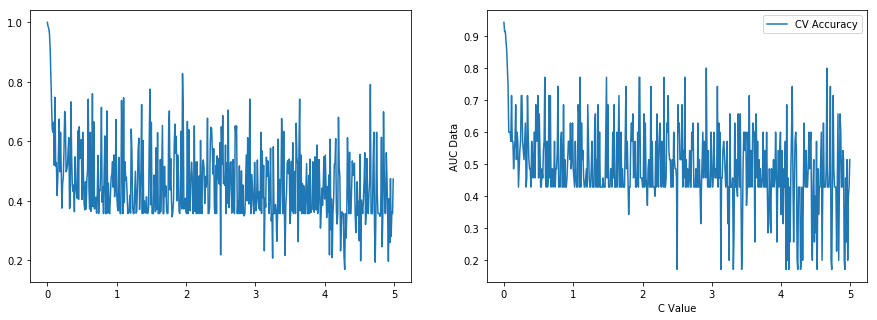

In [172]:
plot_accuracy_without_label()

### Loss Graph

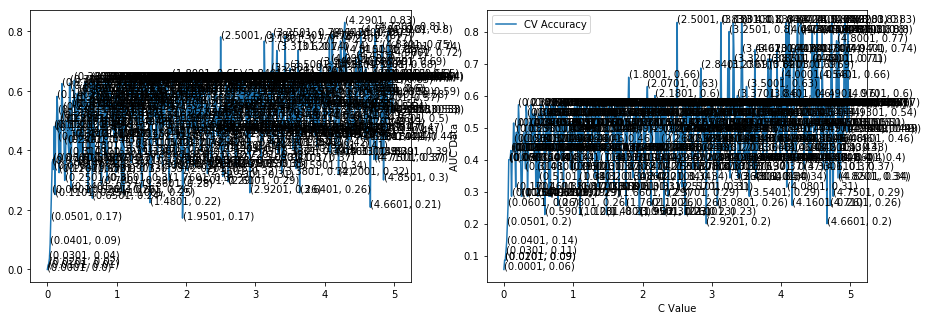

In [173]:
plot_loss()

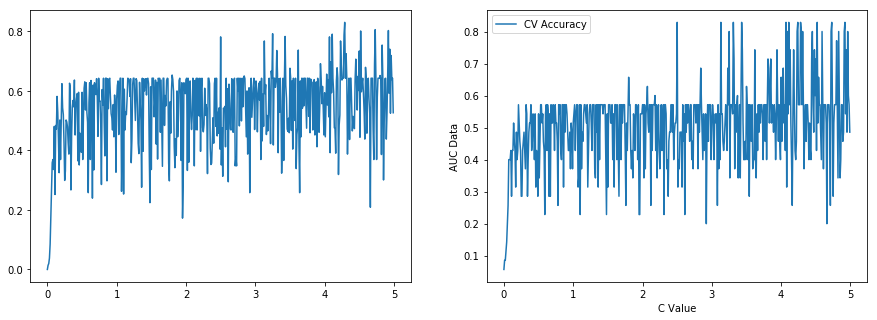

In [174]:
plot_loss_without_label()

### Predicting on Test Data

In [175]:
model_tfidf, predicted_test_classes, predicted_category, accuracy, accuracy_train = training_best_model(0.0001, tf_idf_vect, final_tf_idf_train,"hinge")

In [176]:
print("Getting {} % Accuracy on test Data".format(round(accuracy*100,2)) )

Getting 97.3 % Accuracy on test Data


In [177]:
print(classification_report(X_test['Class'].values.flatten(),predicted_test_classes))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         2
          2       0.93      1.00      0.96        13
          3       1.00      0.92      0.96        12
          4       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        37



Confusion matrix, without normalization
Normalized confusion matrix


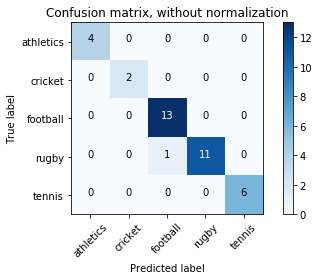

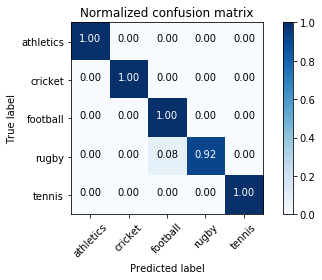

In [178]:
cnf_matrix  = confusion_matrix(X_test['Class'].values.flatten(),predicted_test_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Most Important Feature for class : 
Class Name :  athletics
Class Index :  0


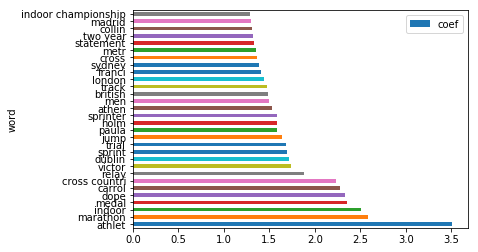

In [179]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'athletics',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  athletics
Class Index :  0


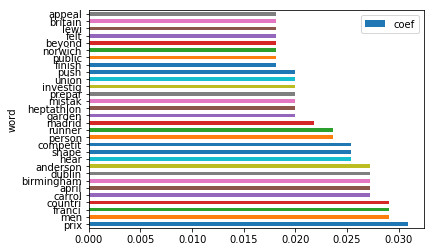

In [240]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'athletics',30,60)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  athletics
Class Index :  0


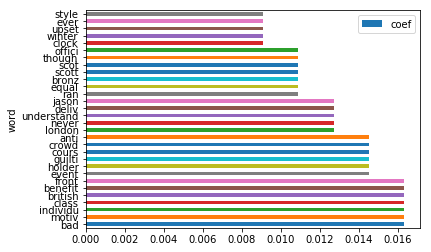

In [241]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'athletics',60,90)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  athletics
Class Index :  0


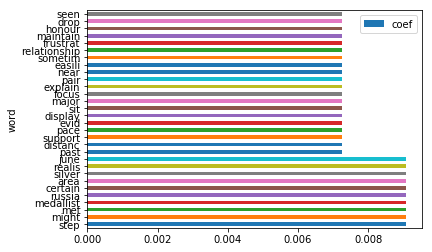

In [242]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'athletics',90,120)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  cricket
Class Index :  1


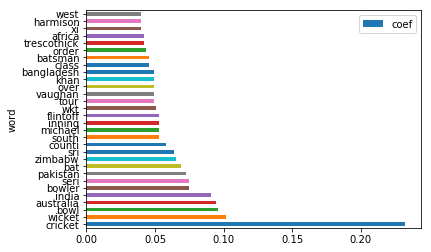

In [243]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'cricket',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  cricket
Class Index :  1


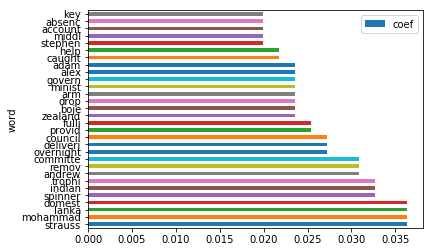

In [244]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'cricket',30,60)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  cricket
Class Index :  1


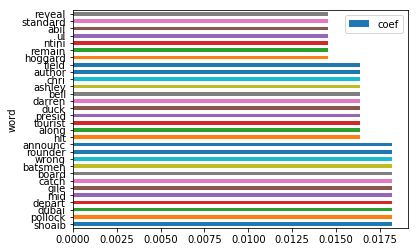

In [245]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'cricket',60,90)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  cricket
Class Index :  1


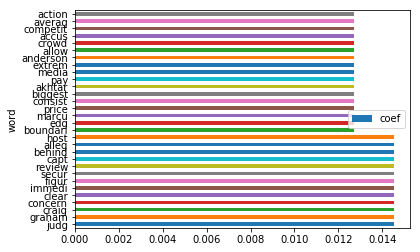

In [246]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'cricket',90,120)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  football
Class Index :  2


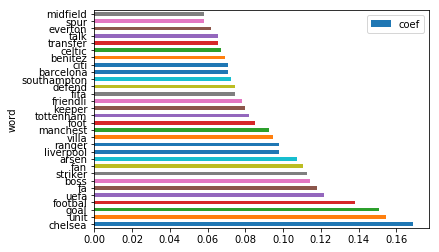

In [247]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'football',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  football
Class Index :  2


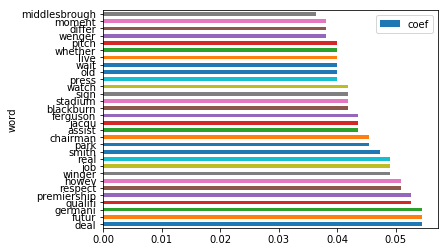

In [248]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'football',30,60)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  football
Class Index :  2


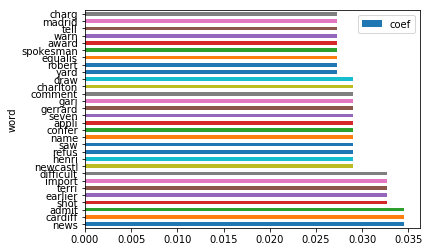

In [249]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'football',60,90)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  football
Class Index :  2


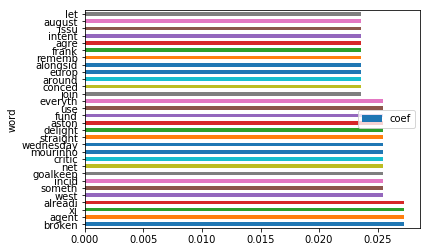

In [250]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'football',90,120)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  rugby
Class Index :  3


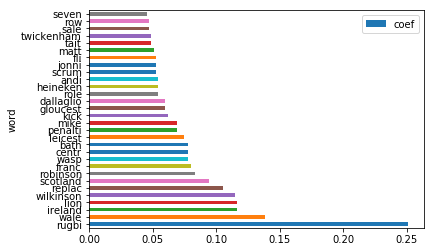

In [251]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'rugby',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  rugby
Class Index :  3


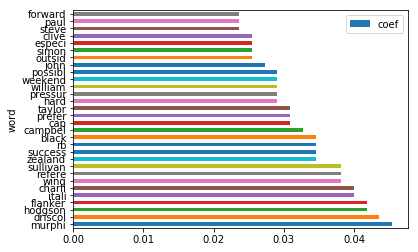

In [252]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'rugby',30,60)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  rugby
Class Index :  3


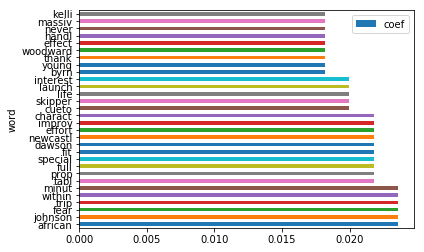

In [253]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'rugby',60,90)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  rugby
Class Index :  3


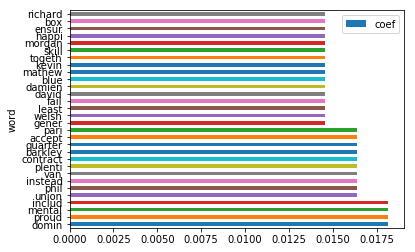

In [254]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'rugby',90,120)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  tennis
Class Index :  4


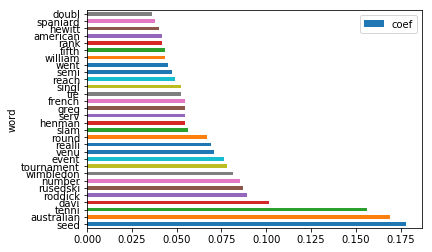

In [255]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'tennis',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  tennis
Class Index :  4


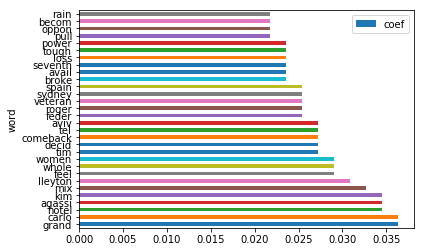

In [256]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'tennis',30,60)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  tennis
Class Index :  4


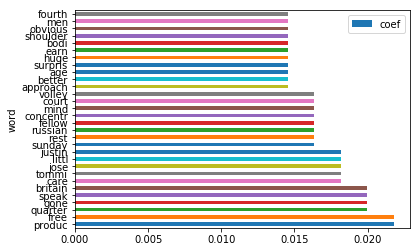

In [257]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'tennis',60,90)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  tennis
Class Index :  4


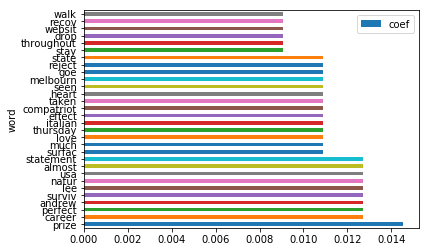

In [258]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'tennis',90,120)
ax = df.plot.barh(x='word', y='coef')

In [259]:
X_test.head()

,Text,Category,Class,Count,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category,TFIDF_Predicted_Test,TFIDF_Predicted_Test_Category
513,Poll explains free-kick decision\n\nReferee Gr...,football,2,1,poll explain free kick decis refere graham pol...,2,football,2,football
693,Wenger steps up row\n\nArsene Wenger has stepp...,football,2,1,wenger step row arsen wenger step feud sir ale...,2,football,2,football
377,Kuznetsova 'failed a drugs test'\n\nUS Open ch...,tennis,4,1,kuznetsova fail drug test us open champion sve...,4,tennis,4,tennis
33,Australia unchanged for Pakistan\n\nAustralia ...,cricket,1,1,australia unchang pakistan australia name unch...,1,cricket,1,cricket
63,Benitez delight after crucial win\n\nLiverpool...,football,2,1,benitez delight crucial win liverpool manag ra...,2,football,2,football


In [260]:
X_test['TFIDF_Predicted_Test'] = predicted_test_classes
X_test['TFIDF_Predicted_Test_Category'] = predicted_category

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [261]:
X_test.head()

,Text,Category,Class,Count,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category,TFIDF_Predicted_Test,TFIDF_Predicted_Test_Category
513,Poll explains free-kick decision\n\nReferee Gr...,football,2,1,poll explain free kick decis refere graham pol...,2,football,2,football
693,Wenger steps up row\n\nArsene Wenger has stepp...,football,2,1,wenger step row arsen wenger step feud sir ale...,2,football,2,football
377,Kuznetsova 'failed a drugs test'\n\nUS Open ch...,tennis,4,1,kuznetsova fail drug test us open champion sve...,4,tennis,4,tennis
33,Australia unchanged for Pakistan\n\nAustralia ...,cricket,1,1,australia unchang pakistan australia name unch...,1,cricket,1,cricket
63,Benitez delight after crucial win\n\nLiverpool...,football,2,1,benitez delight crucial win liverpool manag ra...,2,football,2,football


In [262]:
X_test_not_equal = X_test[X_test['Class'] != X_test['TFIDF_Predicted_Test']]

In [263]:
X_test_not_equal

,Text,Category,Class,Count,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category,TFIDF_Predicted_Test,TFIDF_Predicted_Test_Category
449,Murphy: That was a bruising battle\n\nThat's w...,rugby,3,1,murphi bruis battl call tough game physic fair...,4,tennis,2,football
514,Pountney handed ban and fine\n\nNorthampton co...,rugby,3,1,pountney hand ban fine northampton coach budg ...,3,rugby,2,football
568,SA return to Mauritius\n\nTop seeds South Afri...,football,2,1,sa return mauritiu top seed south africa retur...,4,tennis,4,tennis
281,Hereford 1-1 Doncaster\n\nHereford win 3-1 on ...,football,2,1,hereford doncast hereford win penalti rover to...,3,rugby,3,rugby
227,Finnan says Irish can win group\n\nSteve Finna...,football,2,1,finnan say irish win group steve finnan believ...,3,rugby,3,rugby
331,Irish finish with home game\n\nRepublic of Ire...,football,2,1,irish finish home game republ ireland manag br...,3,rugby,3,rugby
579,Scotland closing in on new coach\n\nScotland c...,cricket,1,1,scotland close new coach scotland cricket offi...,1,cricket,2,football
136,Costin aims for comeback in 2006\n\nJamie Cost...,athletics,0,1,costin aim comeback jami costin paralys say ma...,0,athletics,2,football
404,Mansfield 0-1 Leyton Orient\n\nAn second-half ...,football,2,1,mansfield leyton orient second half goal andi ...,2,football,0,athletics


In [264]:
X_test_not_equal.loc[449,"Text"]

"Murphy: That was a bruising battle\n\nThat's what I call a tough game. It was very physical and fair play to the Italians they made us work very hard for our victory.\n\nTheir organisation was very, very good and they proved again that they are getting better and better as the years go by. It is by far the strongest Italian team that we have faced. We knew all along that we would be a huge threat particularly the first game in the Championship. It was not like the days gone by when you could get scores on the board early. We had to work our socks off and try and build our scores gradually. It was really hard work out there and the players have plenty of bumps and bruises to prove it. I'm not too bad, but there are one or two others who will be feeling it a bit on Monday morning. In the backs, we were not frustrated at such, but the new rucking laws were a little bit problematical. The different interpretations between the referee and the players was a little difficult. But we managed 

Most Important Feature for class : 
Class Name :  tennis
Class Index :  4


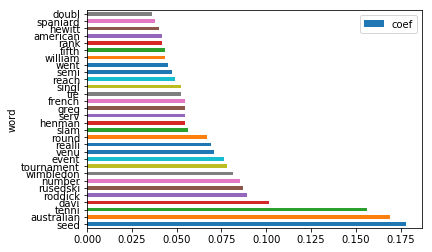

In [265]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'tennis',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Important Feature for class : 
Class Name :  rugby
Class Index :  3


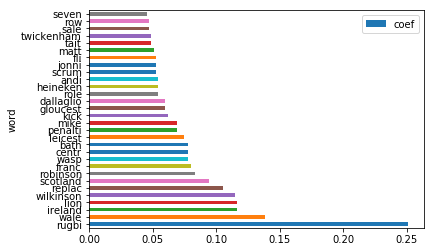

In [266]:
print("Most Important Feature for class : ")
df = most_informative_feature_for_class(tf_idf_vect,model_tfidf,'rugby',0,30)
ax = df.plot.barh(x='word', y='coef')

Most Negative Feature for class : 
Class Name :  tennis
Class Index :  4


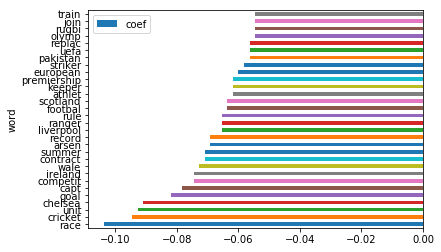

In [267]:
print("Most Negative Feature for class : ")
df = most_negative_feature_for_class(count_vect,model_bow,'tennis',0,30)
ax = df.plot.barh(x='word', y='coef')

In [268]:
X_test_not_equal.loc[449,"preprocessed_data"]

'murphi bruis battl call tough game physic fair play italian made us work hard victori organis good prove get better better year go far strongest italian team face knew along would huge threat particularli first game championship like day gone could get score board earli work sock tri build score gradual realli hard work player plenti bump bruis prove bad one two other feel bit monday morn back frustrat new ruck law littl bit problemat differ interpret refere player littl difficult manag get ball hand got tri near end first half alway good score great work brian alway knew score even though went upstair video refere eddi sullivan calm half time even though ahead spell need advoc get ball territori new ruck law made bit difficult get half penalis lot breakdown kick chanc goal would behind break realli went back play territori game simplifi thing patienc ball everi one littl game follow injuri brian gordon yet know full extent injuri good focu scotland six day recov big ask bruis encount

In [269]:
X_test_not_equal.loc[449,["Category","TFIDF_Predicted_Test_Category"]]

Category                            rugby
TFIDF_Predicted_Test_Category    football
Name: 449, dtype: object

In [270]:
test_data_result = pd.DataFrame({'Text':X_test['Text'], 'Pre-Processed Text':X_test['preprocessed_data'], 'Actual Category':X_test['Category'], 'Predicted Category':X_test['TFIDF_Predicted_Test_Category']})

In [271]:
test_data_result.head()

,Text,Pre-Processed Text,Actual Category,Predicted Category
513,Poll explains free-kick decision\n\nReferee Gr...,poll explain free kick decis refere graham pol...,football,football
693,Wenger steps up row\n\nArsene Wenger has stepp...,wenger step row arsen wenger step feud sir ale...,football,football
377,Kuznetsova 'failed a drugs test'\n\nUS Open ch...,kuznetsova fail drug test us open champion sve...,tennis,tennis
33,Australia unchanged for Pakistan\n\nAustralia ...,australia unchang pakistan australia name unch...,cricket,cricket
63,Benitez delight after crucial win\n\nLiverpool...,benitez delight crucial win liverpool manag ra...,football,football


In [272]:
test_data_result.to_csv('test_result_tf_idf_svm.csv')

### Predicting on Future Unseen Text Data

In [273]:
PATH = '../BBCSports/bbcsport-fulltext-single/data/'

In [274]:
result_unseen_data_test = testing_data(PATH, model_tfidf, tf_idf_vect)

In [275]:
result_unseen_data_test.head()

,Text,Category
0,Henman overcomes rival Rusedski\n\nTim Henman ...,tennis
1,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis
2,Sharapova overcomes tough Molik\n\nWimbledon c...,tennis
3,Hayden sets up Australia win\n\nSecond one-day...,cricket
4,Pietersen gives England a chance\n\nLunch: Eng...,cricket


In [276]:
result_unseen_data_test.to_csv('result_tf_idf_lsvm.csv')

## Summary :

In [277]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Accuracy"]

x.add_row(["BOW", "97.92 %"])
x.add_row(["TF-IDF", "96.25 %"])


print(x)

+--------+----------+
| Model  | Accuracy |
+--------+----------+
|  BOW   | 97.92 %  |
| TF-IDF | 96.25 %  |
+--------+----------+


### From the table We can see that TF-IDF gives good result on Test Data So we can take TF-IDF as our Base Vectorizer for further prediction.